In [1]:
#blending images
#1. Blend same size images
#2. Blend diff size images - Diff methods are used

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
print(img1.shape)
print(img2.shape)

(1401, 934, 3)
(1280, 1277, 3)


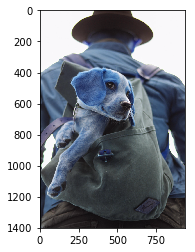

In [4]:
plt.imshow(img1)

In [5]:
#conv to rgb space to use with plt
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

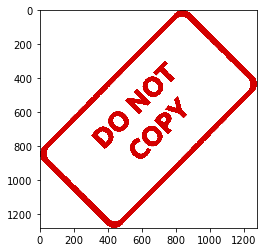

In [6]:
plt.imshow(img2)

In [7]:
#resize to equals
img1 = cv2.resize(img1, (600, 600))
#resize to equals
img2 = cv2.resize(img2, (600, 600))

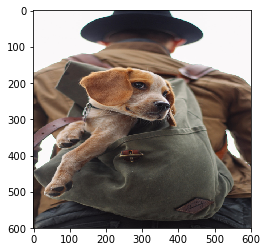

In [8]:
plt.imshow(img1)

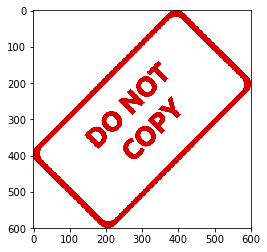

In [9]:
plt.imshow(img2)

In [10]:
#add weighted blend method for equal sized images
print(img1.shape)
print(img2.shape)

(600, 600, 3)
(600, 600, 3)


In [13]:
blended_img = cv2.addWeighted(img1, 0.5, img2, 0.5, 0.3, 0)  #0.5 is weight for each



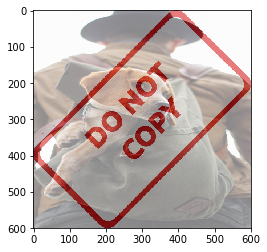

In [14]:
plt.imshow(blended_img)

In [15]:
#to put 2 diff size images together, we can either overlay or use a mask to blend it in
#1. Overlay
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#overlay the small img2 DO NOT COPY over the other from the top left

In [16]:
large_image = img1
small_image = img2

In [17]:
x_offset = 0
y_offset = 0 #start point of the small img

In [18]:
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]  #numpy and image x and y are not the same
#x length det by num of cols, index 1
#y length det by num of rows, index 0

In [19]:
#slicing
#numpy - x axis is determined by the cols
#y axis is det by rows (as above)

#for slicing the img - first coord is the num rows, second is num cols, switch it

large_image[y_offset:y_end, x_offset:x_end] = small_image

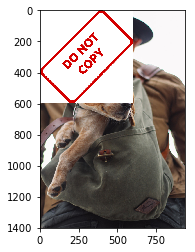

In [20]:
plt.imshow(large_image)

In [21]:
#blend in using a mask
import numpy as np
import cv2

In [22]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 =cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

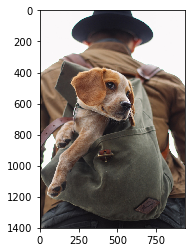

In [23]:
plt.imshow(img1)

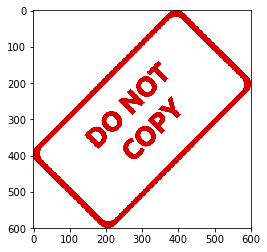

In [24]:
plt.imshow(img2)

In [25]:
#create a roi = cube section from big image which we want to use for blending the other image in
#choosing the bottom right corner

img1.shape

(1401, 934, 3)

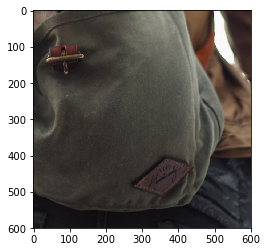

In [26]:
x_offset = 934 - 600
y_offset = 1401 - 600
roi = large_image[y_offset:1401, x_offset:934]
plt.imshow(roi)

In [27]:
roi.shape

(600, 600, 3)

In [28]:
img2.shape

(600, 600, 3)

In [29]:
#creating a mask

#conv to grayscale to prepare the mask
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
img2gray.shape

(600, 600)

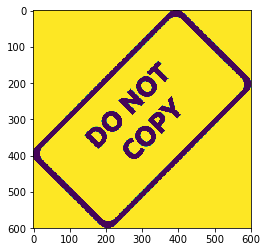

In [31]:
plt.imshow(img2gray)  #viridius

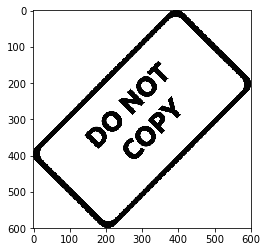

In [34]:
plt.imshow(img2gray, cmap = 'gray')  #we need the red to shine through at the black parts, hence make it transp white by INVERSION and overlay

In [35]:
mask_inv = cv2.bitwise_not(img2gray)
mask_inv.shape

(600, 600)

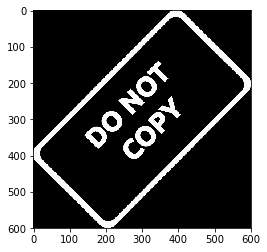

In [36]:
plt.imshow(mask_inv, cmap = 'gray')

In [37]:
#now we need to apply this across 3 channels of red img
#using OR
white_bg = np.full(img2.shape, 255, dtype = np.uint8)

In [38]:
mask3 = cv2.bitwise_or(white_bg, white_bg, mask = mask_inv)
mask3.shape

(600, 600, 3)

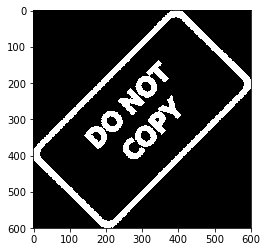

In [39]:
#the bitwise operation here is used to expand the channels
#img1 and img2 are bitwise or'd after a mask is applied to each of them
#just take all 1s (white 3 channel), and apply the mask on it and OR is to reproduce as A OR A = A
plt.imshow(mask3)

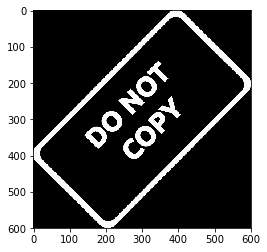

In [40]:
plt.imshow(mask_inv, cmap = 'gray')

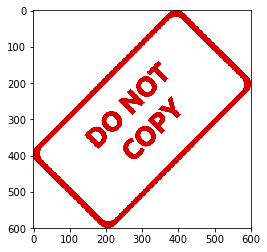

In [42]:
#get the FG image and place on top of mask
plt.imshow(img2)
#mask bw white and black is black, and then apply OR to get required image with white portion transparently allowing other color to shine thru

In [45]:
fg = cv2.bitwise_or(img2, img2, mask = mask_inv)

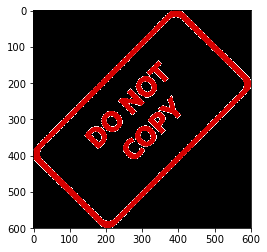

In [46]:
plt.imshow(fg)

In [47]:
fg.shape

(600, 600, 3)

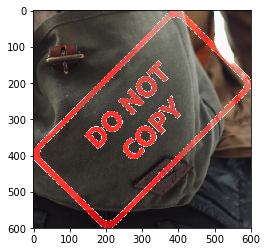

In [48]:
#get the roi and blend in with mask with the ROI
#or will remove the black part

final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)

In [49]:
#add in the rest of the image
large_image = img1
small_image = final_roi

x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]

large_image[y_offset:y_end, x_offset:x_end] = small_image

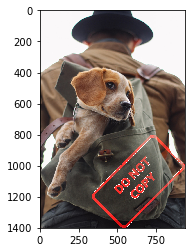

In [50]:
plt.imshow(large_image)